In [1]:
# Movie dataset analysis
 
# 350k+ movies from themoviedb.org
# Dataset downloaded from https://www.kaggle.com/stephanerappeneau/350-000-movies-from-themoviedborg/data

In [2]:
# Import libraries

%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
# Load AllMoviesCastingRaw.csv contents into casts dataframe

casts = pd.read_csv('AllMoviesCastingRaw.csv', encoding = 'utf-8-sig', sep=';', engine = 'python')
casts.head()

,id,actor1_name,actor1_gender,actor2_name,actor2_gender,actor3_name,actor3_gender,actor4_name,actor4_gender,actor5_name,actor5_gender,actor_number,director_name,director_gender,director_number,producer_name,producer_number,screeplay_name,editor_name
0,2,Turo Pajala,0,Susanna Haavisto,0.0,Matti Pellonpää,2,Eetu Hilkamo,0,none,0,4,Aki Kaurismäki,0.0,1,none,0,Aki Kaurismäki,Raija Talvio
1,3,Matti Pellonpää,2,Kati Outinen,1.0,Sakari Kuosmanen,2,Esko Nikkari,2,Kylli Köngäs,0,7,Aki Kaurismäki,0.0,1,Mika Kaurismäki,1,Aki Kaurismäki,Raija Talvio
2,5,Tim Roth,2,Antonio Banderas,2.0,Jennifer Beals,1,Madonna,1,Marisa Tomei,1,24,Allison Anders,1.0,4,Lawrence Bender,1,none,Margaret Goodspeed
3,6,Emilio Estevez,2,Cuba Gooding Jr.,2.0,Denis Leary,2,Jeremy Piven,2,Peter Greene,2,15,Stephen Hopkins,2.0,1,Gene Levy,1,Lewis Colick,Tim Wellburn
4,8,none,0,none,0.0,none,0,none,0,none,0,0,Timo Novotny,0.0,1,Timo Novotny,2,Michael Glawogger,Timo Novotny


In [4]:
# Information provided by the dataset curator: 

# AllMoviesCastingRaw.csv contains the main cast (five first billed actors)  
# and crew (producer, writer, editor and director) for any movie with id 
# (unique themoviedb.org movie identifier) in the first column.

# gender columns:
# 0 -> not available
# 1 -> woman
# 2 -> man

In [5]:
# Number of rows and columns of the casts dataframe

casts.shape

(329044, 19)

In [6]:
# Casts dataframe info 

casts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329044 entries, 0 to 329043
Data columns (total 19 columns):
id                 329044 non-null int64
actor1_name        329044 non-null object
actor1_gender      329044 non-null int64
actor2_name        329044 non-null object
actor2_gender      329043 non-null float64
actor3_name        329044 non-null object
actor3_gender      329044 non-null int64
actor4_name        329044 non-null object
actor4_gender      329044 non-null int64
actor5_name        329044 non-null object
actor5_gender      329044 non-null int64
actor_number       329044 non-null int64
director_name      329044 non-null object
director_gender    329043 non-null float64
director_number    329044 non-null int64
producer_name      329044 non-null object
producer_number    329044 non-null int64
screeplay_name     329044 non-null object
editor_name        329044 non-null object
dtypes: float64(2), int64(8), object(9)
memory usage: 36.4+ MB


In [7]:
# Drop columns that will not be used

casts = casts.drop(['actor3_name', 'actor3_gender', 'actor4_name', 'actor4_gender', 'actor5_name', 'actor5_gender',
                  'actor_number', 'producer_name', 'producer_number', 'screeplay_name', 'editor_name'], axis=1)

casts.shape 

(329044, 8)

In [8]:
# Check the number of id unique values 

casts.id.nunique()

329044

In [9]:
# Count the number of directors per gender

casts.groupby(['director_gender']).size()

director_gender
0.0    157459
1.0     83275
2.0     88309
dtype: int64

In [10]:
# Count the number of first billed actors per gender

casts.groupby(['actor1_gender']).size()

actor1_gender
0    256755
1     20602
2     51687
dtype: int64

In [11]:
# Count the number of second billed actors per gender

casts.groupby(['actor2_gender']).size()

actor2_gender
0.0    217808
1.0     41808
2.0     69427
dtype: int64

In [12]:
# Gender information is not available for a considerable amount of directors, and first and second billed actors. 

In [13]:
# AllMoviesDetailsCleaned.csv contents are loaded into details dataframe

details = pd.read_csv('AllMoviesDetailsCleaned.csv', encoding = 'utf-8-sig', sep = ";",
                       parse_dates = ["release_date"], engine = "python")

details.head()

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
0,2,0,Drama|Crime,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,0.823904,Villealfa Filmproduction Oy,Finland,...,69.0,suomi,Released,NaN,Ariel,7.1,40,2,1,2
1,3,0,Drama|Comedy,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",0.47445,Villealfa Filmproduction Oy,Finland,...,76.0,English,Released,NaN,Shadows in Paradise,7.0,32,1,1,3
2,5,4000000,Crime|Comedy,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,...,98.0,English,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485,2,1,1
3,6,0,Action|Thriller|Crime,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,...,110.0,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69,3,2,1
4,8,42000,Documentary,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,...,80.0,English,Released,A Megacities remix.,Life in Loops (A Megacities RMX),6.4,4,1,1,5


In [14]:
# Number of rows and columns of the details dataframe

details.shape

(329044, 22)

In [15]:
# Details dataframe info 

details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329044 entries, 0 to 329043
Data columns (total 22 columns):
id                             329044 non-null int64
budget                         329044 non-null int64
genres                         207515 non-null object
imdb_id                        250564 non-null object
original_language              328841 non-null object
original_title                 329043 non-null object
overview                       278060 non-null object
popularity                     329044 non-null object
production_companies           329044 non-null object
production_countries           329044 non-null object
release_date                   304998 non-null datetime64[ns]
revenue                        329044 non-null int64
runtime                        292252 non-null float64
spoken_languages               324584 non-null object
status                         327056 non-null object
tagline                        52932 non-null object
title               

In [16]:
# Dropping columns that will not be used

details = details.drop(['budget', 'genres', 'imdb_id', 'overview', 'popularity', 'production_companies', 'production_countries', 
                      'revenue', 'runtime', 'spoken_languages', 'tagline', 'vote_average', 'vote_count',
                      'production_companies_number', 'production_countries_number', 'spoken_languages_number'
                     ], axis=1)

details.shape 

(329044, 6)

In [17]:
# Check the number of id unique values 

details.id.nunique()

329044

In [18]:
# Range of release dates 

print (min(details['release_date']), max(details['release_date']))

1874-12-09 00:00:00 2026-01-01 00:00:00


In [19]:
# Check status categories

details.groupby(['status']).size()

status
Canceled              113
In Production         953
Planned               745
Post Production      1446
Released           322567
Rumored              1232
dtype: int64

In [20]:
# Merge casts and details dataframes on id

movies = pd.merge(details, casts, on = 'id')

movies.head()

,id,original_language,original_title,release_date,status,title,actor1_name,actor1_gender,actor2_name,actor2_gender,director_name,director_gender,director_number
0,2,fi,Ariel,1988-10-21,Released,Ariel,Turo Pajala,0,Susanna Haavisto,0.0,Aki Kaurismäki,0.0,1
1,3,fi,Varjoja paratiisissa,1986-10-16,Released,Shadows in Paradise,Matti Pellonpää,2,Kati Outinen,1.0,Aki Kaurismäki,0.0,1
2,5,en,Four Rooms,1995-12-25,Released,Four Rooms,Tim Roth,2,Antonio Banderas,2.0,Allison Anders,1.0,4
3,6,en,Judgment Night,1993-10-15,Released,Judgment Night,Emilio Estevez,2,Cuba Gooding Jr.,2.0,Stephen Hopkins,2.0,1
4,8,en,Life in Loops (A Megacities RMX),2006-01-01,Released,Life in Loops (A Megacities RMX),none,0,none,0.0,Timo Novotny,0.0,1


In [21]:
# Number of rows and columns of the movies dataframe

movies.shape

(329044, 13)

In [22]:
# Considering released movies only

movies = movies[movies['status'].str.contains('Released', na = False)]

movies.shape

(322567, 13)

In [23]:
# Count of null/NaN occurrences in each column of the movies dataset

movies.isnull().sum()

id                       0
original_language      201
original_title           1
release_date         22507
status                   0
title                    1
actor1_name              0
actor1_gender            0
actor2_name              0
actor2_gender            1
director_name            0
director_gender          1
director_number          0
dtype: int64

In [24]:
# Drop rows whose release dates are null/NaN

movies = movies[pd.notnull(movies['release_date'])]
movies.isnull().sum()

id                     0
original_language    191
original_title         1
release_date           0
status                 0
title                  1
actor1_name            0
actor1_gender          0
actor2_name            0
actor2_gender          0
director_name          0
director_gender        0
director_number        0
dtype: int64

In [25]:
# Create release year column

movies['release_year'] = movies['release_date'].dt.year.astype('int64')
movies.head()

,id,original_language,original_title,release_date,status,title,actor1_name,actor1_gender,actor2_name,actor2_gender,director_name,director_gender,director_number,release_year
0,2,fi,Ariel,1988-10-21,Released,Ariel,Turo Pajala,0,Susanna Haavisto,0.0,Aki Kaurismäki,0.0,1,1988
1,3,fi,Varjoja paratiisissa,1986-10-16,Released,Shadows in Paradise,Matti Pellonpää,2,Kati Outinen,1.0,Aki Kaurismäki,0.0,1,1986
2,5,en,Four Rooms,1995-12-25,Released,Four Rooms,Tim Roth,2,Antonio Banderas,2.0,Allison Anders,1.0,4,1995
3,6,en,Judgment Night,1993-10-15,Released,Judgment Night,Emilio Estevez,2,Cuba Gooding Jr.,2.0,Stephen Hopkins,2.0,1,1993
4,8,en,Life in Loops (A Megacities RMX),2006-01-01,Released,Life in Loops (A Megacities RMX),none,0,none,0.0,Timo Novotny,0.0,1,2006


In [26]:
# Keep movies released up to 2017-11-08

movies = movies[movies['release_date'] < '2017-11-09']
movies.shape

(299727, 14)

In [27]:
# The ten most common movie titles 

movies['original_title'].value_counts().head(10)

Carmen           35
Macbeth          24
Home             20
Blackout         19
Cinderella       19
Solo             19
Hamlet           19
Don Giovanni     18
Anna Karenina    18
Aida             18
Name: original_title, dtype: int64

In [28]:
# Write the ten most common movie titles to csv file

movies['original_title'].value_counts().head(10).to_csv('movieTitles.csv')

In [29]:
# Top ten languages 

movies['original_language'].value_counts().head(10)

en    196011
de     19540
fr     13242
es     10750
ja      8133
it      7347
pt      5998
ru      5065
nl      2750
zh      2657
Name: original_language, dtype: int64

In [30]:
# Write the top ten movie languages to csv file

movies['original_language'].value_counts().head(10).to_csv('movieLanguages.csv')

In [31]:
# Number of movies released in each decade

(movies['release_year'] // 10 * 10).value_counts().sort_index()

1870        2
1880       10
1890     1026
1900     1879
1910     3668
1920     4796
1930    11326
1940    10100
1950    13082
1960    18232
1970    22962
1980    25968
1990    30830
2000    66930
2010    88916
Name: release_year, dtype: int64

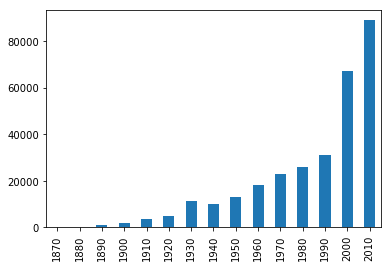

In [32]:
# Plot: number of movies released in each decade

(movies['release_year'] // 10 * 10).value_counts().sort_index().plot(kind='bar')

In [33]:
# Write the number of movies released in each decade to csv file

(movies['release_year'] // 10 * 10).value_counts().sort_index().to_csv('releasesPerDecade.csv')

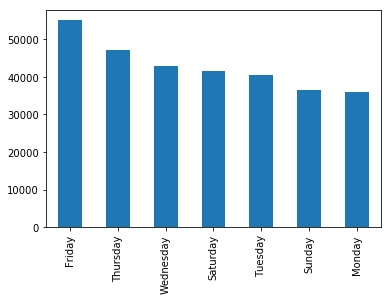

In [34]:
# Plot: number of movies released on each day of the week

movies['release_date'].dt.weekday_name.value_counts().plot(kind='bar')

In [35]:
# Write the number of movies released on each day of the week to csv file

movies['release_date'].dt.weekday_name.value_counts().to_csv('releasesPerDayOfTheWeek.csv')

In [36]:
# Remove rows for which first billed actor gender information is not available

first_billed_actors = movies[(movies['actor1_gender'] != 0)]

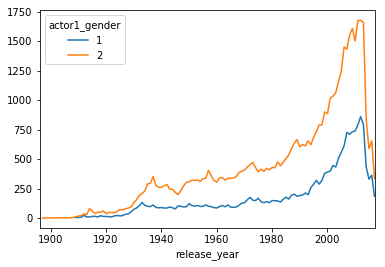

In [37]:
# Plot: number of first billed male and female actors by release year
# 1: first billed female actors
# 2: first billed male actors

first_billed_actors = first_billed_actors.groupby(['release_year', 'actor1_gender']).size()
first_billed_actors = first_billed_actors.unstack('actor1_gender')
first_billed_actors.plot()

In [38]:
# Replace NaN with 0, convert values to integer and write number of first billed male and female actors 
# by release year to csv file

first_billed_actors = first_billed_actors.fillna(0).astype(int)
first_billed_actors.to_csv('firstBilledActors.csv')

In [39]:
# Remove rows for which second billed actor gender information is not available

second_billed_actors = movies[(movies['actor2_gender'] != 0)]

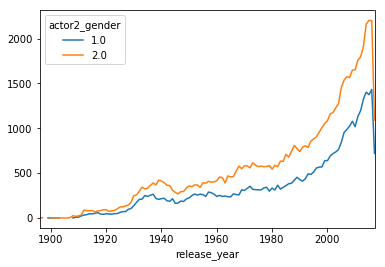

In [40]:
# Plot: number of second billed male and female actors by release year
# 1: first billed female actors
# 2: first billed male actors

second_billed_actors = second_billed_actors.groupby(['release_year', 'actor2_gender']).size()
second_billed_actors = second_billed_actors.unstack('actor2_gender')
second_billed_actors.plot()

In [41]:
# Replace NaN with 0, convert values to integer and write number of second billed male and female actors 
# by release year to csv file

second_billed_actors = second_billed_actors.fillna(0).astype(int)
second_billed_actors.to_csv('secondBilledActors.csv')